# NGSIM Simple Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ngsim = pd.read_csv('Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv')

In [3]:
ngsim.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,...,NaN,NaN,NaN,NaN,NaN,2208,2211,53.34,2.01,i-80
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,...,NaN,NaN,NaN,NaN,NaN,2124,2132,48.92,1.30,us-101
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,1029,1040,38.81,0.92,us-101


In [4]:
ngsim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11850526 entries, 0 to 11850525
Data columns (total 25 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Vehicle_ID     int64  
 1   Frame_ID       int64  
 2   Total_Frames   int64  
 3   Global_Time    int64  
 4   Local_X        float64
 5   Local_Y        float64
 6   Global_X       float64
 7   Global_Y       float64
 8   v_length       float64
 9   v_Width        float64
 10  v_Class        int64  
 11  v_Vel          float64
 12  v_Acc          float64
 13  Lane_ID        int64  
 14  O_Zone         float64
 15  D_Zone         float64
 16  Int_ID         float64
 17  Section_ID     float64
 18  Direction      float64
 19  Movement       float64
 20  Preceding      int64  
 21  Following      int64  
 22  Space_Headway  float64
 23  Time_Headway   float64
 24  Location       object 
dtypes: float64(16), int64(8), object(1)
memory usage: 2.2+ GB


### Look at the different locations in the dataset

In [5]:
ngsim['Location'].unique()

array(['us-101', 'i-80', 'lankershim', 'peachtree'], dtype=object)

In [6]:
ngsim.value_counts(ngsim['Location'])

Location
us-101        4802933
i-80          4566387
lankershim    1607319
peachtree      873887
dtype: int64

### Analyze US 101 data

In [7]:
us101 = ngsim.loc[ngsim['Location'] == 'us-101']
# i80 = ngsim.loc[ngsim['Location'] == 'i-80']
# lankershim = ngsim.loc[ngsim['Location'] == 'lankershim']
# peachtree = ngsim.loc[ngsim['Location'] == 'peachtree']

In [8]:
us101.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,...,NaN,NaN,NaN,NaN,NaN,2124,2132,48.92,1.30,us-101
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,1029,1040,38.81,0.92,us-101
5,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,1029,1040,38.81,0.92,us-101


### Convert time to datetime object, subtract 3 hours in milliseconds for time zone difference (GMT-7)

In [9]:
us101['Global_Time'] = us101['Global_Time'] - 25200000

us101['Global_Time'] = pd.to_datetime(us101['Global_Time'], unit = 'ms', origin='unix')

C:\Users\monil\AppData\Local\Temp\ipykernel_18528\3351203752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us101['Global_Time'] = us101['Global_Time'] - 25200000
C:\Users\monil\AppData\Local\Temp\ipykernel_18528\3351203752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us101['Global_Time'] = pd.to_datetime(us101['Global_Time'], unit = 'ms', origin='unix')


In [10]:
us101.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,2005-06-15 08:07:55.000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
1,515,2330,1123,2005-06-15 08:07:55.000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
3,2127,6459,567,2005-06-15 08:00:24.800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,...,NaN,NaN,NaN,NaN,NaN,2124,2132,48.92,1.30,us-101
4,1033,4827,592,2005-06-15 08:12:04.700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,1029,1040,38.81,0.92,us-101
5,1033,4827,592,2005-06-15 08:12:04.700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,1029,1040,38.81,0.92,us-101


In [11]:
date_range = str(us101['Global_Time'].min()) + ' to ' +str(us101['Global_Time'].max())
date_range

'2005-06-15 07:49:39.700000 to 2005-06-15 08:35:52.200000'

In [12]:
len(us101[us101['Global_Time'] > '2005-06-15 7:50:00'])

4797514

### Break down US101 Data in three groups, as done by the NGSIM analysis report
### The groups will be determined by time, starting at 7:50 am and grouped in 15 minute intervals

In [13]:
# reduce type of each object, saves memory
us101 = us101.astype({'Vehicle_ID': 'int32',
           'Frame_ID': 'int32',
           'Total_Frames': 'int32',
           'Local_X': 'float32',
           'Local_Y': 'float32',
           'Global_X': 'float32',
           'Global_Y': 'float32',
           'v_length':'float32',
           'v_Width': 'float32',
           'v_Class': 'int8',
           'v_Vel': 'float32',
           'v_Acc': 'float32',
           'Lane_ID': 'int8',
           'O_Zone': 'float32',
           'D_Zone': 'float32',
           'Int_ID': 'float32',
           'Section_ID': 'float32',
           'Direction': 'float32',
           'Movement': 'float32',
           'Preceding': 'int32',
           'Following': 'int32',
           'Space_Headway': 'float32',
           'Time_Headway': 'float32'})

In [14]:
us101.dtypes

Vehicle_ID                int32
Frame_ID                  int32
Total_Frames              int32
Global_Time      datetime64[ns]
Local_X                 float32
Local_Y                 float32
Global_X                float32
Global_Y                float32
v_length                float32
v_Width                 float32
v_Class                    int8
v_Vel                   float32
v_Acc                   float32
Lane_ID                    int8
O_Zone                  float32
D_Zone                  float32
Int_ID                  float32
Section_ID              float32
Direction               float32
Movement                float32
Preceding                 int32
Following                 int32
Space_Headway           float32
Time_Headway            float32
Location                 object
dtype: object

### Seperate the data in three different time groups

In [15]:
us101_group_1 = us101[us101['Global_Time'] <= '2005-06-15 8:05:00']
mask = (us101['Global_Time'] > '2005-06-15 8:05:00') & (us101['Global_Time'] <= '2005-06-15 8:20:00')
us101_group_2 = us101[mask]
us101_group_3 = us101[us101['Global_Time'] > '2005-06-15 8:20:00']

In [16]:
us101_group_2

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,2005-06-15 08:07:55.000,30.034000,188.061996,6451203.5,1873252.500,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.099998,5.11,us-101
1,515,2330,1123,2005-06-15 08:07:55.000,30.034000,188.061996,6451203.5,1873252.500,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.099998,5.11,us-101
4,1033,4827,592,2005-06-15 08:12:04.700,6.202000,1701.144043,6452347.5,1872258.500,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,1029,1040,38.810001,0.92,us-101
5,1033,4827,592,2005-06-15 08:12:04.700,6.202000,1701.144043,6452347.5,1872258.500,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,1029,1040,38.810001,0.92,us-101
7,744,3392,996,2005-06-15 08:09:41.200,28.878000,490.085999,6451422.5,1873041.000,15.0,5.9,...,NaN,NaN,NaN,NaN,NaN,740,752,37.799999,1.54,us-101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704773,711,3161,880,2005-06-15 08:09:18.100,41.091999,195.119003,6451200.5,1873239.875,15.5,5.9,...,NaN,NaN,NaN,NaN,NaN,704,713,51.840000,2.34,us-101
8704790,347,2153,580,2005-06-15 08:07:37.300,41.208000,1802.654053,6452401.0,1872164.625,14.5,5.9,...,NaN,NaN,NaN,NaN,NaN,338,353,83.279999,3.33,us-101
8704791,347,2153,580,2005-06-15 08:07:37.300,41.208000,1802.654053,6452401.0,1872164.625,14.5,5.9,...,NaN,NaN,NaN,NaN,NaN,338,353,83.279999,3.33,us-101
8704795,1741,7118,1043,2005-06-15 08:15:53.800,18.614000,1439.137939,6452142.5,1872421.500,13.0,4.9,...,NaN,NaN,NaN,NaN,NaN,1737,1752,53.820000,2.69,us-101


In [17]:
v_counts = us101.v_Class.value_counts()
v_counts

2    4679934
3      99607
1      23392
Name: v_Class, dtype: int64

### Plot peak time

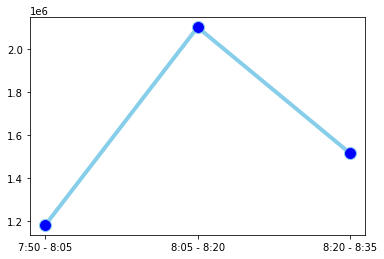

In [18]:
groups = ['7:50 - 8:05', '8:05 - 8:20', '8:20 - 8:35']
vals = [len(us101_group_1), len(us101_group_2), len(us101_group_3)]
plt.plot(groups, vals, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.show()

### Showcase the count of vehicle type over time on the highway

In [19]:
v_counts_1 = us101_group_1.v_Class.value_counts()
v_counts_2 = us101_group_2.v_Class.value_counts()
v_counts_3 = us101_group_3.v_Class.value_counts()
v_count_df = pd.DataFrame({"7:50": v_counts_1, "8:05": v_counts_2, "8:20": v_counts_3})
v_count_df.index.name ='Vehicle Type'
v_count_df.loc["Total"] = v_count_df.sum()
v_count_df
# Vehicle type: 1 - motorcycle, 2 - auto, 3 - truck

,7:50,8:05,8:20
Vehicle Type,,,
2,1141718,2055900,1482316
3,26689,40402,32516
1,15016,5650,2726
Total,1183423,2101952,1517558
